# Roberto Di Via 4486648 - NLP Project

# Social Media Monitor

In this project i'll implement a social media monitor that tracks topics or trends from social media or blogs. This project can help businesses or individuals stay up-to-date with the latest developments and discussions related to their areas of interest. The commits of the project are available at the following [repository](https://github.com/roberto98/Social-Media-Monitor)

To implement this project, I'll follow these steps:

- **1. Data Collection:** Gather data from various sources like news websites, blogs, and social media using APIs or web scraping techniques or RSS feed. In this case I'll use the 20newsgroups dataset from Sklearn that comprises around 18000 newsgroups posts on 20 topics.
- **2. Text Preprocessing:** Clean and normalize the text data using stopword removal, stemming and lemmatization.
- **3. Topic Modeling:** Employ topic modeling techniques like Latent Dirichlet Allocation (LDA) to identify the main topics or themes present in the collected data. This will help filter relevant content based on the topics of interest.
- **4. Sentiment Analysis:** Determine the sentiment of the content (positive, negative, or neutral) using a rule-based approach like VADER sentiment analyzer.
- **5. Summarization:** Generate summaries of the relevant content using extractive summarization based on word frequencies, so that users can quickly grasp the main points without reading the entire text.
- **6. Visualization and Reporting:** Visualize the results in an intuitive dashboard or report format, showing the distribution of topics, sentiment scores, and summaries of the relevant content.

# **0. Import libraries:**


In [1]:
"""
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install nltk
%pip install gensim
%pip install pyLDAvis
%pip install vaderSentiment
%pip install wordcloud
%pip install matplotlib
%pip install tqdm
"""

'\n%pip install numpy\n%pip install pandas\n%pip install scikit-learn\n%pip install nltk\n%pip install gensim\n%pip install pyLDAvis\n%pip install vaderSentiment\n%pip install wordcloud\n%pip install matplotlib\n%pip install tqdm\n'

In [2]:
# --------------- Dataset ------------- #
from sklearn.datasets import fetch_20newsgroups

# --------------- Pre-Processing -------- #
import re

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords


from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# --------------- LDA Model ---------- #
import numpy as np
import random
np.random.seed(42)

import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# --------------- Sentiment Analysis --------- #
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# --------------- Text Summarization ------------- #

# --------------- Visualize and Report ----------- #
import matplotlib.pyplot as plt
from tqdm import tqdm
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\robyd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\robyd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\robyd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **1. Data Collection:**

Data can be collected from various sources like news websites, blogs, and social media using APIs or web scraping techniques or RSS feed. In this case I use the 20newsgroups dataset from Sklearn, which is a collection of approximately 18,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups.
More informations can be found at this [link](http://qwone.com/~jason/20Newsgroups/)

**Exploring the 20newsgroups dataset**

First, I remove the headers, footers and quotes from the texts. The difference between the original text and the clean text that I'll use for my experiments are showed below:

In [3]:
example_text = fetch_20newsgroups(subset='test', categories=['sci.space'])
print(f"Original text:\n{example_text.data[2]}")

Original text:
From: u9152083@wraith.cs.uow.edu.au (Glen Justin Balmer)
Subject: Rocket Types
Organization: University of Wollongong, NSW, Australia.
Lines: 13
NNTP-Posting-Host: wraith.cs.uow.edu.au


The other week I saw a TV program about the american space industry and NASA.
It said that in the 60's they developed a rocket that used ions or nuclear
particles for propolsion.
The government however, didn't give them $1billion for the developement
of a full scale rocket.
Did anybody see this program?
If not, has anybody heard of the particle propolsion system?

Thanx. 8-)

Glen Balmer...




In [4]:
clean_example_text = fetch_20newsgroups(subset='test', categories=['sci.space'], remove=('headers', 'footers', 'quotes'))
print(f"Clean text:\n{clean_example_text.data[2]}")

Clean text:
The other week I saw a TV program about the american space industry and NASA.
It said that in the 60's they developed a rocket that used ions or nuclear
particles for propolsion.
The government however, didn't give them $1billion for the developement
of a full scale rocket.
Did anybody see this program?
If not, has anybody heard of the particle propolsion system?

Thanx. 8-)


Then, I check that the training topics are balanced, so there isn't bias during the training of the LDA model.

In [5]:
# Verify train dataset is balanced
motorcycles_train = fetch_20newsgroups(subset='train', categories=['rec.motorcycles'], remove=('headers', 'footers', 'quotes'))
print("Motorcycles dataset size: ", len(motorcycles_train.data))

hardware_train = fetch_20newsgroups(subset='train', categories=['comp.sys.ibm.pc.hardware'], remove=('headers', 'footers', 'quotes'))
print("Hardware dataset size: ", len(hardware_train.data))

graphics_train = fetch_20newsgroups(subset='train', categories=['comp.graphics'], remove=('headers', 'footers', 'quotes'))
print("Graphics dataset size: ", len(graphics_train.data))

med_train = fetch_20newsgroups(subset='train', categories=['sci.med'], remove=('headers', 'footers', 'quotes'))
print("Med dataset size: ", len(med_train.data))

space_train = fetch_20newsgroups(subset='train', categories=['sci.space'], remove=('headers', 'footers', 'quotes'))
print("Space dataset size: ", len(space_train.data))

guns_train = fetch_20newsgroups(subset='train', categories=['talk.politics.guns'], remove=('headers', 'footers', 'quotes'))
print("Guns dataset size: ", len(guns_train.data))

crypt_train = fetch_20newsgroups(subset='train', categories=['sci.crypt'], remove=('headers', 'footers', 'quotes'))
print("Crypt dataset size: ", len(crypt_train.data))

forsale = fetch_20newsgroups(subset='train', categories=['misc.forsale'], remove=('headers', 'footers', 'quotes'))
print("Forsale dataset size: ", len(forsale.data))

christian = fetch_20newsgroups(subset='train', categories=['soc.religion.christian'], remove=('headers', 'footers', 'quotes'))
print("Christian dataset size: ", len(christian.data))

Motorcycles dataset size:  598
Hardware dataset size:  590
Graphics dataset size:  584
Med dataset size:  594
Space dataset size:  593
Guns dataset size:  546
Crypt dataset size:  595
Forsale dataset size:  585
Christian dataset size:  599


**Train dataset creation**

I create the train dataset. In this case I consider only 4 training topics.

In [115]:
# Create train dataset with selected categories
train_categories = ['rec.sport.baseball', 'talk.politics.guns', 'comp.sys.ibm.pc.hardware', 'sci.space']

newsgroups_train = fetch_20newsgroups(subset='train', categories=train_categories, remove=('headers', 'footers', 'quotes'))

print(newsgroups_train.target_names)
print(f"Topics of first {n} texts: {newsgroups_train.target[:30]}")

['comp.sys.ibm.pc.hardware', 'rec.sport.baseball', 'sci.space', 'talk.politics.guns']
Topics of first 30 texts: [2 2 3 2 1 3 0 1 2 2 3 3 2 3 2 1 0 1 1 2 0 3 0 0 2 2 2 3 3 1]


In [313]:
print("Train corpus size: ", len(newsgroups_train.data))

Train corpus size:  2326


**Test dataset creation**

For the test set, I create a custom dataset composed by 100 documents and 2 topics: 70% rec.autos and 30% sci.space

In [220]:
# Create test dataset 
n_test_docs = 400
n_docs_1 = int(n_test_docs * 0.5)
n_docs_2 = int(n_test_docs * 0.20)
n_docs_3 = int(n_test_docs * 0.20)
n_docs_4 = n_test_docs - n_docs_1 - n_docs_2 - n_docs_3

# Fetch data for each category
test_1 = fetch_20newsgroups(subset='test', categories=['sci.space'], remove=('headers', 'footers', 'quotes'))
test_2 = fetch_20newsgroups(subset='test', categories=['talk.politics.guns'], remove=('headers', 'footers', 'quotes'))
test_3 = fetch_20newsgroups(subset='test', categories=['comp.sys.ibm.pc.hardware'], remove=('headers', 'footers', 'quotes'))
test_4 = fetch_20newsgroups(subset='test', categories=['rec.sport.baseball'], remove=('headers', 'footers', 'quotes'))

print("Topic 1 size: ", len(test_1.data))
print("Topic 2 size: ", len(test_2.data))
print("Topic 3 size: ", len(test_3.data))
print("Topic 4 size: ", len(test_4.data))

# Randomly select the desired number of documents from each category
docs1_indices = np.random.choice(len(test_1.data), n_docs_1, replace=False)
docs2_indices = np.random.choice(len(test_2.data), n_docs_2, replace=False)
docs3_indices = np.random.choice(len(test_3.data), n_docs_3, replace=False)
docs4_indices = np.random.choice(len(test_4.data), n_docs_4, replace=False)


# Create the test dataset
test_data = [test_1.data[i] for i in docs1_indices] + [test_2.data[i] for i in docs2_indices] + [test_3.data[i] for i in docs3_indices] + [test_3.data[i] for i in docs3_indices]
np.random.shuffle(test_data)

Topic 1 size:  394
Topic 2 size:  364
Topic 3 size:  392
Topic 4 size:  397


In [221]:
print(test_data[93])

I'm afriad that's not true.  The monitor problem seems to occur whenever
the 15" Mag monitor is put into 1024x768 mode.  I'm running OS/2 at 1024 and
the same symptoms appear.

It does not seem like a video card problem as the Cirrus Logic 5426 chip and
the ATI GUP seem to cause these problems... two VERY  different cards.


In [222]:
print("Train dataset size: ", len(newsgroups_train.data))
print("Train topics are: ",newsgroups_train.target_names)
print("---------------------------------------------------")
print("Test dataset size: ", len(test_data))

Train dataset size:  2326
Train topics are:  ['comp.sys.ibm.pc.hardware', 'rec.sport.baseball', 'sci.space', 'talk.politics.guns']
---------------------------------------------------
Test dataset size:  440


# **2. Text Preprocessing:** 

I clean and normalize the text data using tokenization, stopword removal, and stemming/lemmatization. I use the `nltk` library for these tasks.

In [223]:
def preprocess_text(data):
    # Remove punctuation, stopwords, numbers, and short words
    stop_words = set(stopwords.words('english'))

    def remove_special_chars(text):
        # Remove email addresses
        text = re.sub(r'\S+@\S+', '', text)
        # Remove URLs
        text = re.sub(r'http\S+|www\S+', '', text)
        # Remove file extensions
        text = re.sub(r'\S+\.\S+', '', text)
        # Replace anything that is not an alphabetic character or a space with an empty string
        return re.sub(r"[^a-zA-Z ]", " ", text)

    def remove_extra_whitespace(text):
        return re.sub(r'\s+', ' ', text).strip()

    def tokenize(text):
        text = remove_special_chars(text) # Remove special characters before tokenization
        return [word for word in word_tokenize(text.lower()) if word.isalpha() and len(word) > 1 and word not in stop_words]

    def lemmatize(text):
        lemmatizer = WordNetLemmatizer()
        return [lemmatizer.lemmatize(word) for word in text]

    # Remove extra whitespace and newline characters
    cleaned_data = [remove_extra_whitespace(text) for text in data]

    # Tokenization
    tokenized_data = [tokenize(text) for text in cleaned_data]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_data = [[stemmer.stem(token) for token in text] for text in tokenized_data]

    # Lemmatize
    lemmatized_data = [lemmatize(text) for text in tokenized_data]

    return tokenized_data, stemmed_data, lemmatized_data

In [224]:
# Preprocess train dataset
tokenized_train_data, stemmed_train_data, lemmatized_train_data = preprocess_text(newsgroups_train.data)

# Preprocess test dataset
tokenized_test_data, stemmed_test_data, lemmatized_test_data = preprocess_text(test_data)

Let's visualize the difference between a tokenized text, stemmed text and a lemmatized text

In [225]:
print(tokenized_train_data[:1])

[['nick', 'haines', 'sez', 'given', 'heard', 'shuttle', 'software', 'rated', 'level', 'maturity', 'strongly', 'doubt', 'lots', 'bugs', 'case', 'level', 'many', 'different', 'levels', 'never', 'heard', 'rating', 'system', 'anyone', 'care', 'clue', 'rating', 'system', 'used', 'arpa', 'organisations', 'measure', 'maturity', 'software', 'process', 'entire', 'process', 'software', 'gets', 'designed', 'written', 'tested', 'delivered', 'supported', 'etc', 'see', 'managing', 'software', 'process', 'watts', 'humphrey', 'addison', 'wesley', 'excellent', 'software', 'engineering', 'text', 'levels', 'software', 'process', 'maturity', 'initial', 'repeatable', 'defined', 'managed', 'optimizing', 'levels', 'approximately', 'characterized', 'follows', 'statistically', 'software', 'process', 'control', 'statistical', 'basis', 'estimating', 'large', 'software', 'long', 'take', 'produce', 'expensive', 'reliable', 'software', 'production', 'level', 'stable', 'process', 'statistical', 'controls', 'rigorous

In [226]:
print(stemmed_train_data[:1])

[['nick', 'hain', 'sez', 'given', 'heard', 'shuttl', 'softwar', 'rate', 'level', 'matur', 'strongli', 'doubt', 'lot', 'bug', 'case', 'level', 'mani', 'differ', 'level', 'never', 'heard', 'rate', 'system', 'anyon', 'care', 'clue', 'rate', 'system', 'use', 'arpa', 'organis', 'measur', 'matur', 'softwar', 'process', 'entir', 'process', 'softwar', 'get', 'design', 'written', 'test', 'deliv', 'support', 'etc', 'see', 'manag', 'softwar', 'process', 'watt', 'humphrey', 'addison', 'wesley', 'excel', 'softwar', 'engin', 'text', 'level', 'softwar', 'process', 'matur', 'initi', 'repeat', 'defin', 'manag', 'optim', 'level', 'approxim', 'character', 'follow', 'statist', 'softwar', 'process', 'control', 'statist', 'basi', 'estim', 'larg', 'softwar', 'long', 'take', 'produc', 'expens', 'reliabl', 'softwar', 'product', 'level', 'stabl', 'process', 'statist', 'control', 'rigor', 'project', 'manag', 'done', 'someth', 'project', 'plan', 'detail', 'softwar', 'configur', 'manag', 'qualiti', 'assur', 'proce

In [227]:
print(lemmatized_train_data[:1])

[['nick', 'haines', 'sez', 'given', 'heard', 'shuttle', 'software', 'rated', 'level', 'maturity', 'strongly', 'doubt', 'lot', 'bug', 'case', 'level', 'many', 'different', 'level', 'never', 'heard', 'rating', 'system', 'anyone', 'care', 'clue', 'rating', 'system', 'used', 'arpa', 'organisation', 'measure', 'maturity', 'software', 'process', 'entire', 'process', 'software', 'get', 'designed', 'written', 'tested', 'delivered', 'supported', 'etc', 'see', 'managing', 'software', 'process', 'watt', 'humphrey', 'addison', 'wesley', 'excellent', 'software', 'engineering', 'text', 'level', 'software', 'process', 'maturity', 'initial', 'repeatable', 'defined', 'managed', 'optimizing', 'level', 'approximately', 'characterized', 'follows', 'statistically', 'software', 'process', 'control', 'statistical', 'basis', 'estimating', 'large', 'software', 'long', 'take', 'produce', 'expensive', 'reliable', 'software', 'production', 'level', 'stable', 'process', 'statistical', 'control', 'rigorous', 'proje

# **3. Topic Modeling:** 
Apply Latent Dirichlet Allocation (LDA) to identify the main topics in the collected data. In this part I'll use a scratch implementation and I'll compare it with `gensim` library version. Then I'll tune and evaluate both models, on the testing set, computing the coherence scores.

## LDA explanation

Latent Dirichlet Allocation (LDA) is a generative probabilistic model used in topic modeling. It is a statistical model that allows us to discover latent topics within a collection of documents. LDA assumes that each document in the collection is a mixture of various topics, and each topic is a distribution over words.

It's an unsupervised learning method, meaning that it generates a probabilistic model to identify groups of topics without the need for known class labels. It uses only the distribution of words to mathematically model topic.

Here's a step-by-step explanation of how LDA works:

1. **Initialization**: Choose the number of topics K to extract from the document collection and randomly assign each word in each document to one of the K topics.

2. **Iteration**: Iterate through each word in each document and reassign the word to a topic based on: the proportion of words in the document that belong to the topic, and the proportion of occurrences of the word across all documents that belong to the topic.
   - For each document d:
     - For each word w in document d:
       - Calculate two probabilities:
         - P(topic t | document d): Proportion of assignments to topic t over all documents that come from word w.
         - P(word w | topic t): Proportion of words in document d that are currently assigned to topic t.
       - Reassign word w to a new topic based on the probabilities calculated above.
   
   - Repeat the above step for a fixed number of iterations or until convergence.

3. **Output**: Repeat step 2 for a certain number of iterations or until convergence. LDA provides two main outputs:
   - The distribution of topics in each document.
   - The distribution of words in each topic.

As a result of the training, each document will be represented as a combination of topics, and each topic will be represented as a distribution over words. This can be used to classify new documents, identify related terms, and create recommendations.

![LDA](https://www.researchgate.net/profile/Diego-Buenano-Fernandez/publication/339368709/figure/fig1/AS:860489982689280@1582168207260/Schematic-of-LDA-algorithm.png)

## Building the LDA model

I define the dictionary and bag-of-words of the train corpus that will be used for the training of the LDA model.

In [228]:
# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(lemmatized_train_data)

# Create a bag-of-words representation of the documents
train_corpus = [dictionary.doc2bow(text) for text in lemmatized_train_data]

In [229]:
# human-readable format of corpus (term-frequency)
[[(dictionary[id], freq) for id, freq in cp] for cp in train_corpus[:1]]

[[('addison', 1),
  ('analysed', 1),
  ('anyone', 1),
  ('approximately', 1),
  ('arpa', 1),
  ('assurance', 1),
  ('automated', 1),
  ('basis', 2),
  ('bug', 1),
  ('care', 1),
  ('case', 1),
  ('certified', 1),
  ('characterized', 1),
  ('clue', 1),
  ('configuration', 2),
  ('consistent', 1),
  ('contract', 1),
  ('control', 2),
  ('controlled', 1),
  ('defect', 1),
  ('defined', 2),
  ('delivered', 1),
  ('designed', 1),
  ('detail', 1),
  ('different', 1),
  ('done', 1),
  ('doubt', 1),
  ('effective', 1),
  ('engineering', 2),
  ('entire', 1),
  ('estimating', 1),
  ('etc', 1),
  ('excellent', 1),
  ('expensive', 1),
  ('follows', 1),
  ('framework', 1),
  ('gathered', 1),
  ('get', 1),
  ('given', 1),
  ('goal', 1),
  ('group', 1),
  ('haines', 1),
  ('heard', 2),
  ('humphrey', 1),
  ('implementation', 1),
  ('includes', 1),
  ('information', 2),
  ('initial', 1),
  ('inspection', 1),
  ('large', 1),
  ('level', 6),
  ('like', 1),
  ('long', 1),
  ('lot', 1),
  ('managed', 1),


I set the number of topics to extract from the text. In this case I know that the topics of newspaper are 4, but normally it's unknown so it's a good thing doing an hyperparameter tuning. As we will see later, we will try different number of topics to extract, to identify the best suddivision of the text. 

In [230]:
# Set the number of topics to extract from documents
num_topics = 4

### Gensim version

First I'll try the [LDA Gensim model](https://radimrehurek.com/gensim/models/ldamodel.html) in order to understand its logic and implement my scratch version. 

**Training phase**

The The hyperparameter alpha affects sparsity of the document-topic (theta) distributions, whose default value is 1. Similarly, the hyperparameter eta can also be specified, which affects the topic-word distribution's sparsity.

In [231]:
# Train the LDA model using the processed training data
lda_gensim = LdaModel(corpus=train_corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=50, alpha='auto', per_word_topics=True)

Once the model is trained I print the words distribution for each of the topic extracted. I also create a function that maps the topic with the associated label, according to more relevant words of the topic.

In [232]:
# Mapping between topic number and category name
def topic_category_mapping(topic_id):
    if topic_id == 0:
        return 'Space'
    elif topic_id == 1:
        return "Baseball"
    elif topic_id == 2:
        return "Hardware"
    elif topic_id == 3:
        return 'Guns'
    else:
        return f'Unknown Category {topic_id}'

In [233]:
# Print topics and associated category names
for topic_num, topic in lda_gensim.show_topics(num_topics=num_topics, formatted=False):
    topic_words = [word for word, _ in topic]
    category_name = topic_category_mapping(topic_num)
    print(f"Topic {topic_num} ({category_name}) | Words: {topic_words}\n")

Topic 0 (Space) | Words: ['space', 'launch', 'satellite', 'year', 'would', 'system', 'nasa', 'also', 'data', 'program']

Topic 1 (Baseball) | Words: ['year', 'game', 'player', 'team', 'cub', 'good', 'would', 'one', 'run', 'last']

Topic 2 (Hardware) | Words: ['drive', 'scsi', 'card', 'one', 'system', 'get', 'bit', 'would', 'controller', 'know']

Topic 3 (Guns) | Words: ['gun', 'would', 'firearm', 'weapon', 'right', 'people', 'one', 'law', 'state', 'like']



We explores the trained topics relationship and their words distribution.

In [234]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_gensim, train_corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_gensim_vis.html')

**Test phase**

In this phase I infers the trained model on a new unseen corpus. Then I print the topics distribution of each document of the corpus.

In [235]:
test_topic_distributions_gensim = [lda_gensim.get_document_topics(dictionary.doc2bow(text)) for text in lemmatized_test_data]

In [236]:
# Display the topic distribution for all test documents
for i, topic_dist in enumerate(test_topic_distributions_gensim):

    if i == 10: break

    # Sort the topic distribution by probability in descending order
    sorted_topic_dist = sorted(topic_dist, key=lambda x: -x[1])
    # Create a list to store the formatted topics
    formatted_topics = []

    # Format and store each topic
    for topic_id, probability in sorted_topic_dist:
        # Associate label to the topic
        category_name = topic_category_mapping(topic_id)

        formatted_topic = f"[{topic_id}] {category_name} {probability:.2f}"
        formatted_topics.append(formatted_topic)

    # Join the formatted topics into a string
    formatted_topics_str = " - ".join(formatted_topics)

    print(f"Document {i + 1} topics : {formatted_topics_str}")

Document 1 topics : [3] Guns 0.89 - [0] Space 0.10
Document 2 topics : [3] Guns 0.75 - [0] Space 0.17 - [1] Baseball 0.04 - [2] Hardware 0.04
Document 3 topics : [3] Guns 0.78 - [2] Hardware 0.20
Document 4 topics : [2] Hardware 0.99
Document 5 topics : [3] Guns 0.49 - [0] Space 0.41 - [2] Hardware 0.11
Document 6 topics : [3] Guns 0.65 - [0] Space 0.26 - [2] Hardware 0.09
Document 7 topics : [2] Hardware 0.43 - [0] Space 0.26 - [1] Baseball 0.22 - [3] Guns 0.09
Document 8 topics : [2] Hardware 0.78 - [0] Space 0.13 - [3] Guns 0.09
Document 9 topics : [0] Space 0.78 - [2] Hardware 0.22
Document 10 topics : [2] Hardware 0.79 - [0] Space 0.13 - [3] Guns 0.08


### Scratch version

Now it's time to implement my LDA version from scratch. In order to compare it as much as possible with the gensim model, I implemented using using same method's name and I/O. In this way I can use the same CoherenceModel function provided by Gensim to evaluate both models. Also, the input corpus is in the Gensim bag-of-words format, which is a list of tuples (word index, word count).

In [237]:
import LDA_from_scratch

import importlib
importlib.reload(LDA_from_scratch)

<module 'LDA_from_scratch' from 'C:\\Users\\robyd\\Documents\\GitHub\\Social-Media-Monitor\\LDA_from_scratch.py'>

**Training phase**

As I did for the gensim model, I do the training, the topics mapping and the inference for my scratch model. Since the returned output is in the same format of the LDA gensim model, I can recycle the code.

In [238]:
# Train the LDA model using the processed training data
lda_scratch = LDA_from_scratch.LDA(num_topics=num_topics, id2word=dictionary, num_iterations=50)
lda_scratch.fit(train_corpus)

Training: 100%|██████████| 50/50 [04:33<00:00,  5.47s/it]


In [268]:
# Mapping between topic number and category name
def topic_category_mapping_scratch(topic_id):
    if topic_id == 0:
        return 'Baseball'
    elif topic_id == 1:
        return 'Guns'
    elif topic_id == 2:
        return 'Hardware'
    elif topic_id == 3:
        return 'Space'
    else:
        return f'Unknown Category {topic_id}'

In [269]:
# Print topics and associated category names
for topic_num, topic in lda_scratch.show_topics(num_topics=num_topics, num_words=15):
    topic_words = [word for word, _ in topic]
    category_name = topic_category_mapping_scratch(topic_num)
    print(f"Topic {topic_num} ({category_name}) | Words: {topic_words}\n")

Topic 0 (Baseball) | Words: ['well', 'run', 'could', 'time', 'know', 'last', 'team', 'good', 'get', 'game', 'like', 'one', 'think', 'would', 'year']

Topic 1 (Guns) | Words: ['bill', 'crime', 'time', 'control', 'government', 'one', 'state', 'weapon', 'law', 'right', 'file', 'firearm', 'people', 'would', 'gun']

Topic 2 (Hardware) | Words: ['work', 'thanks', 'know', 'bus', 'hard', 'bit', 'problem', 'use', 'controller', 'one', 'disk', 'system', 'card', 'scsi', 'drive']

Topic 3 (Space) | Words: ['one', 'moon', 'lunar', 'shuttle', 'program', 'also', 'data', 'earth', 'mission', 'orbit', 'system', 'satellite', 'nasa', 'launch', 'space']



**Testing phase**

In [270]:
test_topic_distributions_scratch = [lda_scratch.get_document_topics(dictionary.doc2bow(text)) for text in lemmatized_test_data]

In [271]:
# Display the topic distribution for all test documents
for i, topic_dist in enumerate(test_topic_distributions_scratch):
    
    if i == 10: break
    
    # Sort the topic distribution by probability in descending order
    sorted_topic_dist = sorted(topic_dist, key=lambda x: -x[1])
    # Create a list to store the formatted topics
    formatted_topics = []
    
    # Format and store each topic
    for topic_id, probability in sorted_topic_dist:
        # Associate label to the topic
        category_name = topic_category_mapping_scratch(topic_id)

        formatted_topic = f"[{topic_id}] {category_name} {probability:.2f}"
        formatted_topics.append(formatted_topic)

    # Join the formatted topics into a string
    formatted_topics_str = " - ".join(formatted_topics)

    print(f"Document {i + 1} topics : {formatted_topics_str}")

Document 1 topics : [0] Baseball 0.43 - [2] Hardware 0.24 - [3] Space 0.19 - [1] Guns 0.14
Document 2 topics : [3] Space 0.44 - [0] Baseball 0.34 - [1] Guns 0.18 - [2] Hardware 0.04
Document 3 topics : [1] Guns 0.64 - [2] Hardware 0.18 - [0] Baseball 0.09 - [3] Space 0.09
Document 4 topics : [0] Baseball 0.47 - [2] Hardware 0.29 - [1] Guns 0.18 - [3] Space 0.06
Document 5 topics : [3] Space 0.55 - [0] Baseball 0.22 - [2] Hardware 0.19 - [1] Guns 0.04
Document 6 topics : [2] Hardware 0.49 - [0] Baseball 0.34 - [3] Space 0.15 - [1] Guns 0.01
Document 7 topics : [2] Hardware 0.58 - [3] Space 0.27 - [0] Baseball 0.11 - [1] Guns 0.04
Document 8 topics : [0] Baseball 0.95 - [1] Guns 0.02 - [2] Hardware 0.02 - [3] Space 0.02
Document 9 topics : [2] Hardware 0.55 - [3] Space 0.27 - [1] Guns 0.17 - [0] Baseball 0.01
Document 10 topics : [1] Guns 0.35 - [2] Hardware 0.29 - [0] Baseball 0.19 - [3] Space 0.16


### Evaluation of the models

The [CoherenceModel](https://radimrehurek.com/gensim/models/coherencemodel.html) class in the gensim library is used for evaluating the coherence of topic models. It provides different measures for computing the coherence score. Here are the different measures used in the computation of coherence score for the LDA model:

- c_v: This measure calculates the coherence based on the pairwise word-similarity scores. It considers the co-occurrence of words within a sliding window in the corpus.
- u_mass: This measure calculates the coherence based on the document co-occurrence statistics. It uses the logarithm of the ratio of the probability of observing the words in a topic to the probability of observing the words in the entire corpus.
- c_uci: This measure calculates the coherence based on the pointwise mutual information (PMI) of words in a topic. It considers the co-occurrence of words within a sliding window in the corpus and compares it to the expected co-occurrence under a random distribution.
- c_npmi: This measure calculates the coherence based on the normalized pointwise mutual information (NPMI) of words in a topic. It normalizes the PMI score by taking into account the rarity of the words.

These measures provide different perspectives on the coherence of topics in a topic model. The choice of measure depends on the specific requirements and characteristics of the corpus and the topic model being evaluated.

In [243]:
def compute_coherence_score(model, texts, dictionary, coherence='c_v'):
    coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence=coherence)
    return coherence_model.get_coherence()

In [244]:
print("Coherence score for Gensim LDA:", compute_coherence_score(lda_gensim, tokenized_train_data, dictionary))

Coherence score for Gensim LDA: 0.4697669653568806


In [245]:
print("Coherence score for Scratch LDA:", compute_coherence_score(lda_scratch, tokenized_train_data, dictionary))

Coherence score for Scratch LDA: 0.5548407163807654


### Hyperparameters Tuning

Hyperparameters are the parameters of the LDA model that are set prior to training and determine important aspects of the model behavior. The three key hyperparameters in LDA are:
- K - The number of topics to discover from the documents.
- alpha - The Dirichlet parameter for the document-topic distributions. Controls sparsity of document-topic distributions.
- beta - The Dirichlet parameter for the topic-word distributions. Controls sparsity of topic-word distributions.

Tuning these hyperparameters is crucial for optimizing LDA performance. The initial number of topics is typically unknown and it is necessary to extract it using an unsupervised approach. Hyperparameter tuning helps us to find the best number of topics by evaluating different models based on their coherence scores. It ensures that the resulting topics are meaningful and representative of the underlying content in the text corpus. Without hyperparameter tuning, we may end up with suboptimal or uninformative topics that do not capture the true essence of the data. 

In [301]:
def hyperparameter_tuning(corpus, texts, dictionary, num_topics_range, n_iterations):
    coherence_scores_scratch = []
    coherence_scores_gensim = []
    
    for num_topics in num_topics_range:
        # Train Scratch LDA model
        lda_scratch = LDA_from_scratch.LDA(num_topics=num_topics, id2word=dictionary, num_iterations=n_iterations)
        lda_scratch.fit(corpus)

        # Train Gensim LDA model
        lda_gensim = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=n_iterations)

        # Compute coherence score for Scratch LDA model
        coherence_score_scratch = compute_coherence_score(lda_scratch, texts, dictionary)
        coherence_scores_scratch.append(coherence_score_scratch)

        # Compute coherence score for Gensim LDA model
        coherence_score_gensim = compute_coherence_score(lda_gensim, texts, dictionary)
        coherence_scores_gensim.append(coherence_score_gensim)

    # Find optimal number of topics based on coherence score
    optimal_num_topics_scratch = num_topics_range[np.argmax(coherence_scores_scratch)]
    optimal_num_topics_gensim = num_topics_range[np.argmax(coherence_scores_gensim)]
    print(f"Optimal number of topics (scratch model): {optimal_num_topics_scratch} | Coherence score: {coherence_scores_scratch[np.argmax(coherence_scores_scratch)]}")
    print(f"Optimal number of topics (gensim model): {optimal_num_topics_gensim} | Coherence score: {coherence_scores_gensim[np.argmax(coherence_scores_gensim)]}")

    # Plot coherence scores
    plt.plot(num_topics_range, coherence_scores_scratch, label='LDA Scratch')
    plt.plot(num_topics_range, coherence_scores_gensim, label='LDA Gensim')
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence Score')
    plt.legend()
    plt.show()

    return optimal_num_topics_scratch, optimal_num_topics_gensim


From the following chart we can understand which is the best number of topics to set in our scenario

Training: 100%|██████████| 50/50 [09:20<00:00, 11.21s/it]
E:\Programmi\Anaconda\envs\unige\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in scalar divide
  m_lr_i = np.log(numerator / denominator)
E:\Programmi\Anaconda\envs\unige\lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in scalar divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


Optimal number of topics (scratch model): 10 | Coherence score: nan
Optimal number of topics (gensim model): 4 | Coherence score: 0.35723155519518973


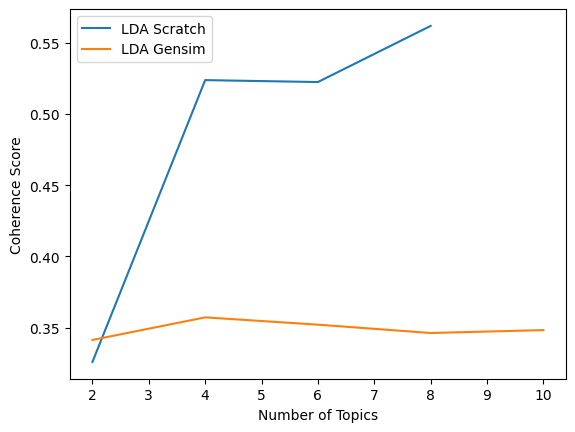

In [302]:
num_topics_range = [2, 4, 6, 8, 10]
n_iterations = 50

optimal_num_topics_scratch, optimal_num_topics_gensim = hyperparameter_tuning(train_corpus, tokenized_train_data, dictionary, num_topics_range, n_iterations)

If we want a more accurate hyperparameter tuning, a possible approach is a Grid search over combinations of number of topics, alpha, and beta, selecting the model with the best coherence score.

In [310]:
def grid_search_hyperparameter(corpus, texts, dictionary, num_topics_range, alpha_range, beta_range):
    best_coherence_scratch = float('-inf')
    best_coherence_gensim = float('-inf')
    best_params_scratch = None
    best_params_gensim = None

    coherence_scores_scratch = []
    coherence_scores_gensim = []
    
    n_iterations = 50

    for num_topics in num_topics_range:
        for alpha in alpha_range:
            for beta in beta_range:
                # Train Scratch LDA model
                lda_scratch = LDA_from_scratch.LDA(num_topics=num_topics, id2word=dictionary, num_iterations=n_iterations, alpha=alpha, beta=beta)
                lda_scratch.fit(corpus)

                # Train Gensim LDA model
                lda_gensim = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=n_iterations, alpha=alpha, eta=beta)

                # Compute coherence score for Scratch LDA model
                coherence_score_scratch = compute_coherence_score(lda_scratch, texts, dictionary)
                coherence_scores_scratch.append(coherence_score_scratch)

                # Compute coherence score for Gensim LDA model
                coherence_score_gensim = compute_coherence_score(lda_gensim, texts, dictionary)
                coherence_scores_gensim.append(coherence_score_gensim)

                # Update best params for Scratch LDA
                if coherence_score_scratch > best_coherence_scratch:
                    best_coherence_scratch = coherence_score_scratch
                    best_params_scratch = (num_topics, alpha, beta)

                # Update best params for Gensim LDA
                if coherence_score_gensim > best_coherence_gensim:
                    best_coherence_gensim = coherence_score_gensim
                    best_params_gensim = (num_topics, alpha, beta)

    print(f"Best params for Scratch LDA: {best_params_scratch} | Best coherence score: {best_coherence_scratch}")
    print(f"Best params for Gensim LDA: {best_params_gensim} | Best coherence score: {best_coherence_gensim}")

    return best_params_scratch, best_params_gensim


In [ ]:
num_topics_range = [2, 4, 6, 8, 10]
alpha_range = [0.2, 0.5, 0.8]
beta_range = [0.2, 0.5, 0.8]
optimal_num_topics_scratch, optimal_num_topics_gensim = grid_search_hyperparameter(train_corpus, tokenized_train_data, dictionary, num_topics_range, alpha_range, beta_range)

In [312]:
print(f"Best params for Scratch LDA -> Num topics: {optimal_num_topics_scratch[0]} | Alpha: {optimal_num_topics_scratch[1]} | Beta: {optimal_num_topics_scratch[2]}")
print(f"Best params for Gensim LDA -> Num topics: {optimal_num_topics_gensim[0]} | Alpha: {optimal_num_topics_gensim[1]} | Beta: {optimal_num_topics_gensim[2]}")

Best params for Scratch LDA -> Num topics: 6 | Alpha: 0.2 | Beta: 0.2
Best params for Gensim LDA -> Num topics: 10 | Alpha: 0.5 | Beta: 0.2


# **4. Sentiment Analysis:**

Determine the sentiment of the content using the VADER sentiment analyzer from the `vaderSentiment`library.
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a pre-trained sentiment analysis tool specifically designed for social media texts and doesn't require preprocessing like tokenization, stemming, or lemmatization

In [246]:
# Function to analyze sentiment using VADER
def get_sentiment(text):
     # Initialize VADER sentiment analyzer
    analyzer = SentimentIntensityAnalyzer()
    sentiment_scores = analyzer.polarity_scores(text)
    
    # Perform sentiment analysis on individual words
    words = text.split()
    words_sentiment_scores = [analyzer.polarity_scores(word) for word in words]

    # Divide words into positive, negative, and neutral lists
    positive_words = [word for word, score in zip(words, words_sentiment_scores) if score['compound'] > 0]
    negative_words = [word for word, score in zip(words, words_sentiment_scores) if score['compound'] < 0]

    return sentiment_scores, positive_words, negative_words

In [247]:
test_sentiments = [get_sentiment(text) for text in test_data]

In [300]:
# Display the sentiment scores for the test documents
scores_list = []
global_normalized_score = 0
for i, (sentiment, pos_words, neg_words) in enumerate(test_sentiments):
    if i == 10: break
    scores_list.append(sentiment['compound'])
    global_normalized_score += sentiment['compound']
    print(f"Document {i + 1}: {sentiment}")
    
print(f"\nAverage sentiment: {np.mean(scores_list)}")
print(f"\nGlobal normalized sentiment: {global_normalized_score/len(test_sentiments)}")

Document 1: {'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'compound': 0.3247}
Document 2: {'neg': 0.174, 'neu': 0.701, 'pos': 0.125, 'compound': -0.9962}
Document 3: {'neg': 0.18, 'neu': 0.82, 'pos': 0.0, 'compound': -0.7119}
Document 4: {'neg': 0.055, 'neu': 0.83, 'pos': 0.115, 'compound': 0.3612}
Document 5: {'neg': 0.011, 'neu': 0.973, 'pos': 0.016, 'compound': 0.1999}
Document 6: {'neg': 0.101, 'neu': 0.836, 'pos': 0.063, 'compound': -0.8251}
Document 7: {'neg': 0.036, 'neu': 0.878, 'pos': 0.086, 'compound': 0.8811}
Document 8: {'neg': 0.063, 'neu': 0.894, 'pos': 0.043, 'compound': -0.5145}
Document 9: {'neg': 0.025, 'neu': 0.88, 'pos': 0.095, 'compound': 0.9708}
Document 10: {'neg': 0.058, 'neu': 0.901, 'pos': 0.041, 'compound': -0.2144}

Average sentiment: -0.05244

Global normalized sentiment: -0.0011918181818181817


# **5. Summarization:**

Generate summaries of the relevant content using extractive summarization based on word frequency. For this, I'll follow these steps:
- 1. Split the text into sentences.
- 2. Tokenize the sentences.
- 3. Calculate the frequency of each word in the text.
- 4. Assign a score to each sentence based on the frequency of the words in the sentence.
- 5. Select the top N sentences with the highest scores as the summary.

This is a simple implementation of extractive summarization without using any libraries. Note that this approach does not consider the semantic meaning of words or the coherence of the summary. More advanced techniques, such as using word embeddings or graph-based methods, can improve the quality of the summary.

In [249]:
def extractive_summarization(text, n_sentences=1, min_sentence_length=6):
    # Preprocess the text
    tokenized_data, stemmed_data, lemmatized_data = preprocess_text([text])
    preprocessed_text = ' '.join(lemmatized_data[0])

    # Split the text into sentences
    sentences = sent_tokenize(text)
    # Tokenize the sentences
    tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

    # Calculate word frequencies using the preprocessed text
    word_freq = {}
    for token in word_tokenize(preprocessed_text):
        if token not in word_freq:
            word_freq[token] = 1
        else:
            word_freq[token] += 1
    
    # If word_freq is empty, return the original text as the summary
    if not word_freq:
        return text
    
    # Calculate the maximum frequency
    max_freq = max(word_freq.values())

    # Normalize the word frequencies
    for word in word_freq:
        word_freq[word] = word_freq[word] / max_freq

    # Assign scores to sentences based on normalized word frequencies and sentence length
    sentence_scores = {}
    for i, sentence in enumerate(tokenized_sentences):
        if len(sentence) >= min_sentence_length:
            score = sum([word_freq[token] for token in sentence if token in word_freq]) / len(sentence)
            sentence_scores[sentences[i]] = score

    # Select top sentences for the summary
    sorted_sentences = sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)
    summary_sentences = [sentence for sentence, score in sorted_sentences[:n_sentences]]

    # Combine the selected sentences to form the summary
    summary = ' '.join(summary_sentences)

    return summary

In [250]:
summaries = [extractive_summarization(text, n_sentences=1) for text in test_data]

# Print summary for every document in the test set
for i, summary in enumerate(summaries):
    if i == 10: break
    print(f"Summary {i + 1}: {summary}")

Summary 1: common law recognized as
legally binding under international law?
Summary 2: How could you
hurt someone?
Summary 3: We mustn't allow our Constitution to be cheapened by applying
it to everybody, eh?
Summary 4: I need to know the jumper settings for master and/or slave operation on
a Maxtor 7080AT (80MB IDE) hard disk.
Summary 5: Basically deploy one side of the space dock (using a scissor shaped structure,
saw it on beyond 2000), then maneuer the side to next to the satellite and then
move the rest of the dock around the satellite and seal it..
Summary 6: Please note that I'm not defending light pollution.
Summary 7: I am using the PC Power and Cooling CPU Cooler.
Summary 8: The presence of such a card on an IRQ line precludes
   the use of that IRQ by any other adapter unless it is physically 
   disconnected by a jumper.
Summary 9: May the best design win.
Summary 10: 

I have had a SCSI and IDE drive working together for some years now.


# **6. Visualization and Reporting:**

Visualize the results in an intuitive dashboard or report format, showing the distribution of topics, sentiment scores, and summaries of the relevant content.

I merge all the test documents into a unique text, so I can apply the sentiment analysis and the text summarization as if I'm reading 1 text.

In [251]:
# Merge all the texts in the test set
merged_test_text = ' '.join(test_data)
_, _, lemmatized_merged_text = preprocess_text([merged_test_text])

## Main Topics and Words 
In this section I print the main topic identified from all the documents in the test set, so from 100 different texts, using the LDA model from gensim and my own implementation. The test set is composed by 70% space topic, so what I expect is that the model will gives me "Space" as main topic.

In [252]:
def plot_topic_distribution(topic_distribution, topic_mapping_func):
    # Extract topic IDs and probabilities
    topic_ids, probabilities = zip(*topic_distribution)
    topic_names = [topic_mapping_func(topic_id) for topic_id in topic_ids]

    # Create a bar chart
    plt.bar(topic_names, probabilities)
    plt.xlabel('Topic')
    plt.ylabel('Probability')
    plt.title('Topic Distribution in Document')
    plt.xticks(topic_ids)

    # Show the bar chart
    plt.show()


### Gensim version

In [276]:
# Get the topic distribution for the merged text
merged_text_topic_distribution = lda_gensim.get_document_topics(dictionary.doc2bow(lemmatized_merged_text[0]))

In [277]:
print(f"\nMain topics distribution:")

# Display the topic distribution for all test documents
for i, topic_dist in enumerate(merged_text_topic_distribution):
    sorted_topic_dist = sorted([topic_dist], key=lambda x: -x[1])
    formatted_topics = []
    for topic_id, probability in sorted_topic_dist:
        topic_name =  topic_category_mapping(topic_id)
        formatted_topic = f"[{topic_id}] {topic_name} -> {probability}"
        formatted_topics.append(formatted_topic)
        formatted_topics_str = " - ".join(formatted_topics)
    print(f"{formatted_topics_str}")

# Identify the main topic based on the highest average topic distribution
main_topic = max(merged_text_topic_distribution, key=lambda x: x[1])[0]
topic_name = topic_category_mapping(main_topic)

# Display the main topic keywords
main_topic_keywords = lda_gensim.show_topic(main_topic)
print(f"\nMain {topic_name} keywords:\n{main_topic_keywords}")


Main topics distribution:
[0] Space -> 0.5092468857765198
[1] Baseball -> 0.033869899809360504
[2] Hardware -> 0.20577013492584229
[3] Guns -> 0.25111308693885803

Main Space keywords:
[('space', 0.014276594), ('launch', 0.009620012), ('satellite', 0.0069525735), ('year', 0.0057334187), ('would', 0.004854343), ('system', 0.004558679), ('nasa', 0.0042425212), ('also', 0.0038070597), ('data', 0.0035667554), ('program', 0.003561188)]


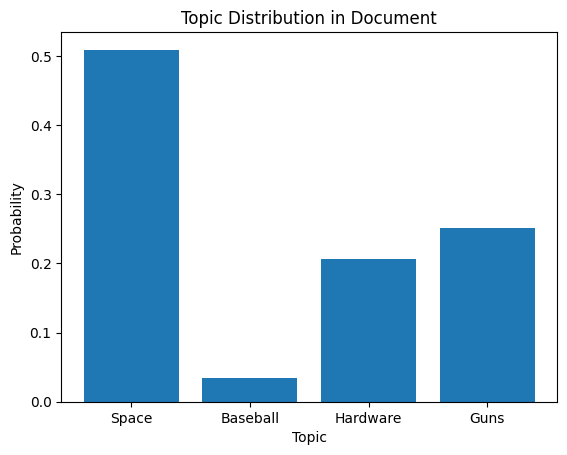

In [278]:
plot_topic_distribution(merged_text_topic_distribution, topic_category_mapping)

### Scratch version

In [288]:
test_topic_distributions = lda_scratch.get_document_topics(dictionary.doc2bow(lemmatized_test_data[0]))

In [289]:
print(f"\nMain topics distribution:")

# Display the topic distribution
#print(test_topic_distributions)
sorted_topic_dist = sorted(test_topic_distributions, key=lambda x: -x[1])
for topic_id, probability in sorted_topic_dist:
    # Exclude probabilities under 0.2
    #if probability < 0.2:
    #    continue

    topic_name = topic_category_mapping_scratch(topic_id)
    formatted_topic = f"[{topic_id}] {topic_name} -> {probability}"
    print(formatted_topic)

# Identify the main topic based on the highest probability
main_topic = sorted_topic_dist[0][0]
topic_name = topic_category_mapping_scratch(main_topic)

# Display the main topic keywords
main_topic_keywords = lda_scratch.show_topic(main_topic)
print(f"\nMain {topic_name} keywords:\n{main_topic_keywords}")


Main topics distribution:
[3] Space -> 0.428571429
[1] Guns -> 0.285714286
[0] Baseball -> 0.19047619
[2] Hardware -> 0.095238095

Main Space keywords:
[('also', 0.003982564), ('data', 0.004398653), ('earth', 0.00443828), ('mission', 0.004497721), ('orbit', 0.004497721), ('system', 0.005488409), ('satellite', 0.005666733), ('nasa', 0.006043194), ('launch', 0.006280959), ('space', 0.018070141)]


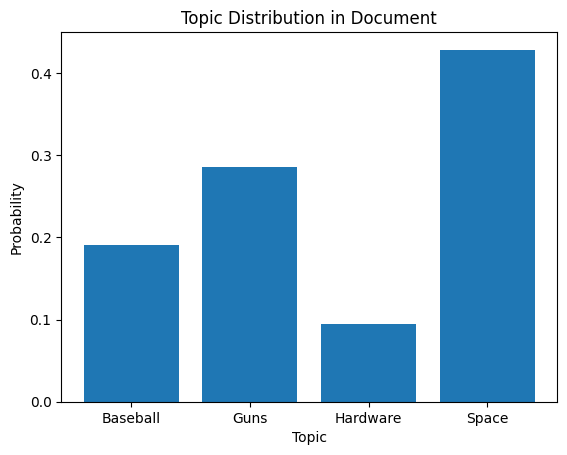

In [290]:
plot_topic_distribution(test_topic_distributions, topic_category_mapping_scratch)

## Average Sentiment
In this section I report the average sentiment of the test corpus, and I display the sentiments scores using a bar-chart.

In [291]:
global_sentiment, positive_words, negative_words = get_sentiment(merged_test_text)

print(f"Global Text Sentiment: {global_sentiment}")
print(f"\nPositive words: {positive_words[:10]}")
print(f"\nNegative words: {negative_words[:10]}")

Global Text Sentiment: {'neg': 0.064, 'neu': 0.847, 'pos': 0.089, 'compound': 1.0}

Positive words: ['legally', 'certain', 'number', 'solution?', 'pretty', 'like', 'protect', 'like', 'Like', 'devote']

Negative words: ['limited', 'NO', 'threatened.', 'threatened.', 'threats,', 'lonely', 'abusive', 'threatens', 'hurt', 'rapist.']


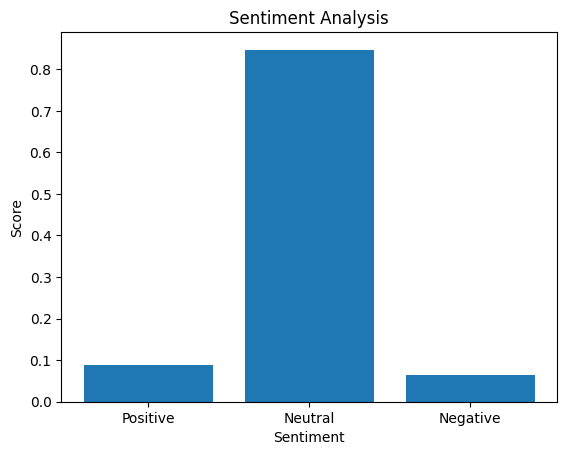

In [292]:
# Function to visualize sentiment scores
def visualize_sentiment(sentiment_scores):
    labels = ['Positive', 'Neutral', 'Negative']
    values = [sentiment_scores['pos'], sentiment_scores['neu'], sentiment_scores['neg']]

    plt.bar(labels, values)
    plt.xlabel('Sentiment')
    plt.ylabel('Score')
    plt.title('Sentiment Analysis')
    plt.show()
    
visualize_sentiment(global_sentiment)

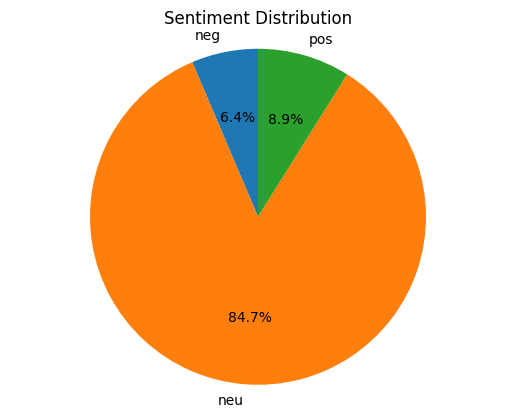

In [293]:
def plot_sentiment_pie_chart(sentiment_scores):
    # Extract sentiment labels and scores
    labels, scores = zip(*sentiment_scores.items())

    # Create a pie chart
    plt.pie(scores[:-1], labels=labels[:-1], autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Sentiment Distribution')

    # Show the pie chart
    plt.show()
    
plot_sentiment_pie_chart(global_sentiment)

## Summary
In this section I print a summary of all documents in the test corpus, showing the most relevant phrases.

In [294]:
summary = extractive_summarization(merged_test_text, n_sentences=10)

In [295]:
print(summary)

No one would
 wAC> take the offer. What
would be a good time then? Seems that everyone talks about using one system and one system only per
mission, why not have more than one propulsion system? Any information would be appreciated. Saturn

     No planet in the solar system is adorned like Saturn. I would like a monitor that can handle high resolutions like 1024x1024 NI. 6 issues (one year sub. They wouldn't do
anything like that - NO WAY. LOX would
be stored aft. The Soviets had accomplished their first mission to two celestial
    bodies with one space vessel.


## Words distribution
In this section I show the most frequent words in the test set. Bigger are the words showed, higher is their frequency. Also, I decided to show the most positive words and the negative ones presented in the test corpus and the most frequent words in the summary generated.

In [296]:
# Function to generate a word cloud
def generate_wordcloud(texts, title):
    all_text = ' '.join(texts)
    wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size=5, max_words=100).generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

E:\Programmi\Anaconda\envs\unige\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


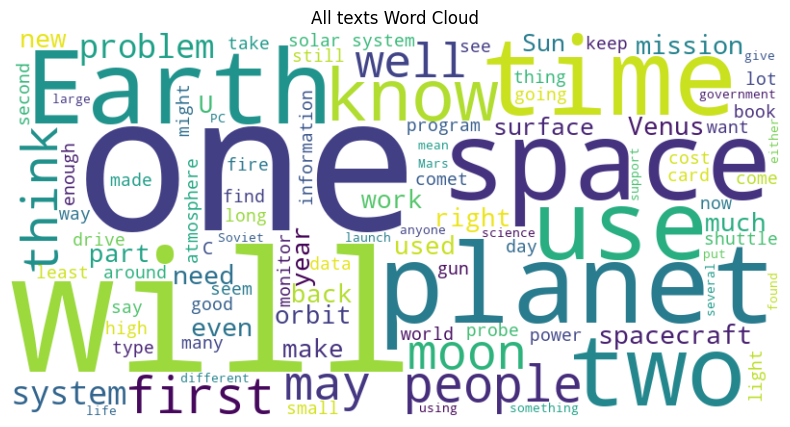

In [297]:
# Generate word cloud
generate_wordcloud([merged_test_text], "All texts Word Cloud")

E:\Programmi\Anaconda\envs\unige\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


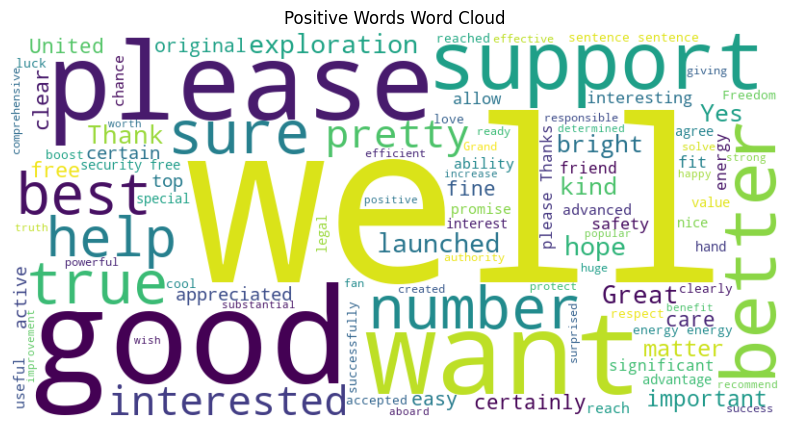

E:\Programmi\Anaconda\envs\unige\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


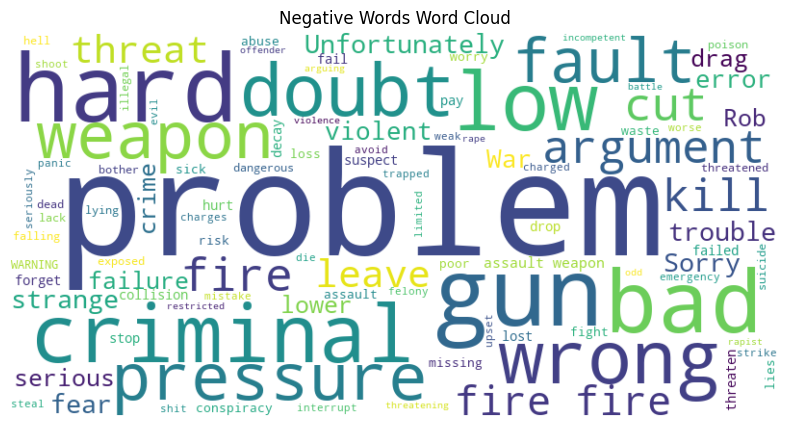

In [298]:
generate_wordcloud(positive_words, "Positive Words Word Cloud")
generate_wordcloud(negative_words, "Negative Words Word Cloud")

E:\Programmi\Anaconda\envs\unige\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


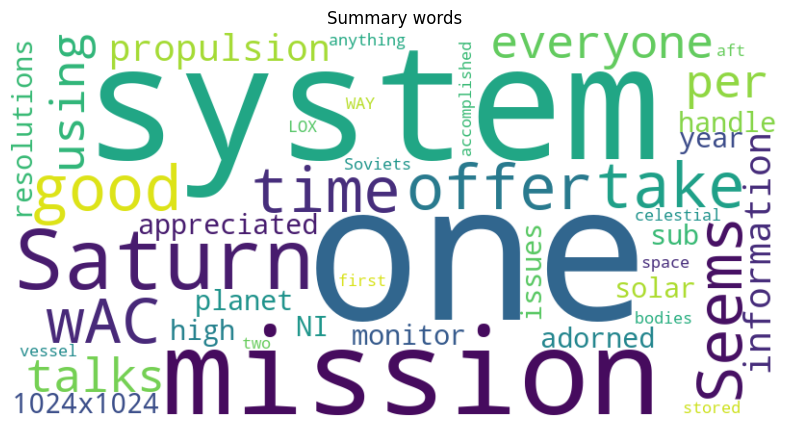

In [299]:
generate_wordcloud([summary], "Summary words")